# SARIMA
- about SARIMA: https://ai-trend.jp/basic-study/time-series-analysis/sarima_model/
- data: https://www.mhlw.go.jp/stf/covid-19/open-data.html

## Omajinai

In [1]:
from dateutil.relativedelta import relativedelta

import pandas as pd

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "jupyterlab+svg"

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Data

In [3]:
!wget https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv -O newly_confirmed_cases_daily.csv

--2021-12-29 20:27:08--  https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
Resolving covid19.mhlw.go.jp (covid19.mhlw.go.jp)... 18.65.148.50, 18.65.148.99, 18.65.148.42, ...
Connecting to covid19.mhlw.go.jp (covid19.mhlw.go.jp)|18.65.148.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94640 (92K) [application/octet-stream]
Saving to: ‘newly_confirmed_cases_daily.csv’

newly_confirmed_cas 100%[===================>]  92.42K  --.-KB/s    in 0.03s   

2021-12-29 20:27:09 (2.68 MB/s) - ‘newly_confirmed_cases_daily.csv’ saved [94640/94640]



In [4]:
df = pd.read_csv('newly_confirmed_cases_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
print(df.shape)
display(df.head(1))
display(df.tail(5))

(713, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-24,262,12,0,0,0,0,0,10,1,7,...,0,0,19,0,0,1,0,0,0,33
2021-12-25,266,22,0,0,0,0,0,6,2,10,...,0,0,10,0,3,0,0,0,2,29
2021-12-26,225,22,0,0,0,0,0,1,2,6,...,0,0,4,3,0,0,0,0,0,21
2021-12-27,163,11,0,1,0,0,0,2,1,10,...,0,0,2,0,0,0,0,0,0,5
2021-12-28,316,20,0,0,1,0,0,1,0,23,...,0,0,7,3,1,0,0,0,0,29


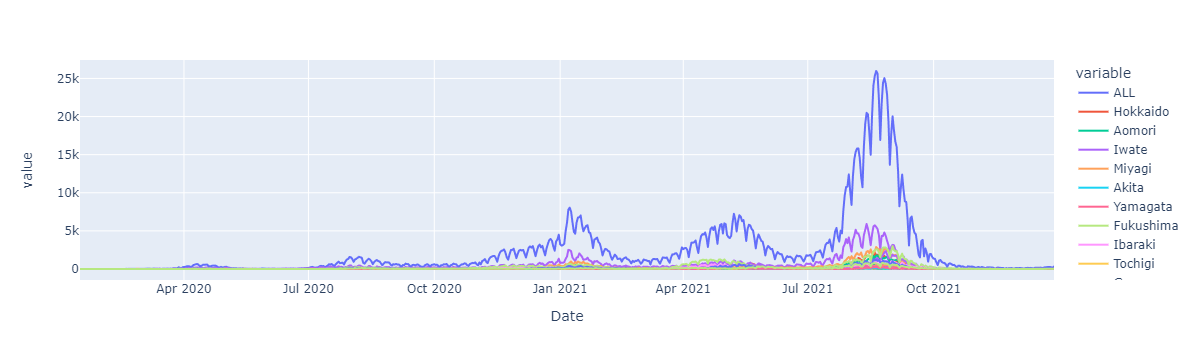

In [5]:
px.line(df, )

In [6]:
df_gr = df.groupby(pd.Grouper(level='Date', freq='W')).sum()
df_gr = df_gr.drop(df_gr.index[-1])
print(df_gr.shape)
display(df_gr.head(1))
display(df_gr.tail(5))

(102, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-19,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-28,630,66,0,0,4,0,5,2,5,1,...,3,1,42,0,0,0,1,0,0,13
2021-12-05,783,38,0,0,2,8,43,1,0,12,...,0,0,38,0,0,1,1,2,0,21
2021-12-12,803,23,3,0,3,1,7,7,14,11,...,0,0,27,0,0,0,1,0,0,24
2021-12-19,1038,53,1,0,1,0,1,1,8,12,...,0,0,18,0,0,0,0,0,9,25
2021-12-26,1551,140,0,0,2,0,1,17,12,45,...,0,0,77,3,4,1,0,0,8,127


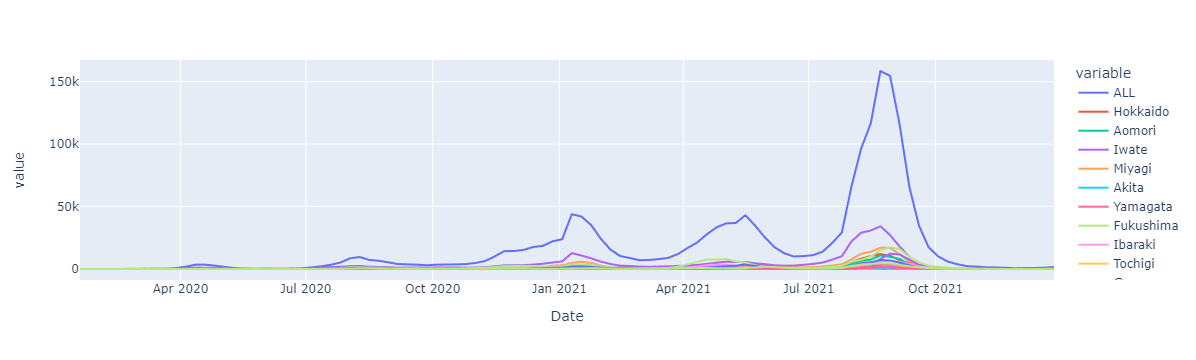

In [7]:
px.line(df_gr,)

## SARIMA - ALL

In [8]:
import itertools

# 各パラメータの範囲を決める
p = d = q = range(0, 3)
sp = sd = sq = range(0, 2)

# p, d, q　の組み合わせを列挙するリストを作成
pdq = list(itertools.product(p, d, q))
# P, D, Q　の組み合わせを列挙するリストを作成すると同時に、後ろに　s = 12　を決め打ちでつけている。
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(sp, sd, sq))]

In [12]:
import warnings

warnings.filterwarnings("ignore") # warnings を表示させないようにする

def gridSearch(ts_train):
    best_result = [0, 0, 10000000]
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = SARIMAX(ts_train,
                              order = param,
                              seasonal_order=param_seasonal,
                              enforce_stationarity=True,
                              enforce_invertibility=True)

                results = mod.fit(disp=False)

                if results.aic < best_result[2]:
                    best_result = [param, param_seasonal, results.aic]
                    print('order{}, s_order{} - AIC: {}'.format(param, param_seasonal, results.aic))
            except KeyboardInterrupt:
                print('KeyboardInterrupt')
                break
            except:
                print('ERROR! Cannot fit! order{}, s_order{}'.format(param, param_seasonal))
                continue

    print('Best AIC model:', best_result)

In [13]:
gridSearch(df_gr.ALL)

order(0, 0, 0), s_order(0, 0, 0, 12) - AIC: 2418.466478960866
order(0, 0, 0), s_order(0, 1, 0, 12) - AIC: 2179.2561178308324
order(0, 0, 0), s_order(0, 1, 1, 12) - AIC: 2172.4855640950686
order(0, 0, 0), s_order(1, 1, 0, 12) - AIC: 2137.180569737361
order(0, 0, 1), s_order(0, 1, 0, 12) - AIC: 2065.4993015546165
order(0, 0, 1), s_order(1, 1, 0, 12) - AIC: 2029.4374997482719
order(0, 0, 2), s_order(0, 1, 0, 12) - AIC: 2001.8991153670418
order(0, 1, 0), s_order(0, 1, 0, 12) - AIC: 1978.0503331462946
order(0, 1, 0), s_order(0, 1, 1, 12) - AIC: 1966.9074780631636
order(0, 1, 0), s_order(1, 1, 0, 12) - AIC: 1935.7929168782703
order(0, 1, 1), s_order(0, 1, 0, 12) - AIC: 1926.3362003780942
order(0, 1, 1), s_order(0, 1, 1, 12) - AIC: 1876.1668212972656
order(0, 2, 0), s_order(1, 1, 0, 12) - AIC: 1864.0616443359008
order(1, 2, 0), s_order(0, 1, 1, 12) - AIC: 1861.4541075632142
order(1, 2, 1), s_order(0, 1, 1, 12) - AIC: 1854.1900660368904
ERROR! Cannot fit! order(2, 1, 1), s_order(1, 1, 1, 12)
o

In [14]:
order = (1, 2, 0)
seasonal_order = (1, 1, 0, 12)
model = SARIMAX(df_gr.ALL, order=order, seasonal_order=seasonal_order)
result = model.fit(disp=False)
result.aic

1877.0852131180313

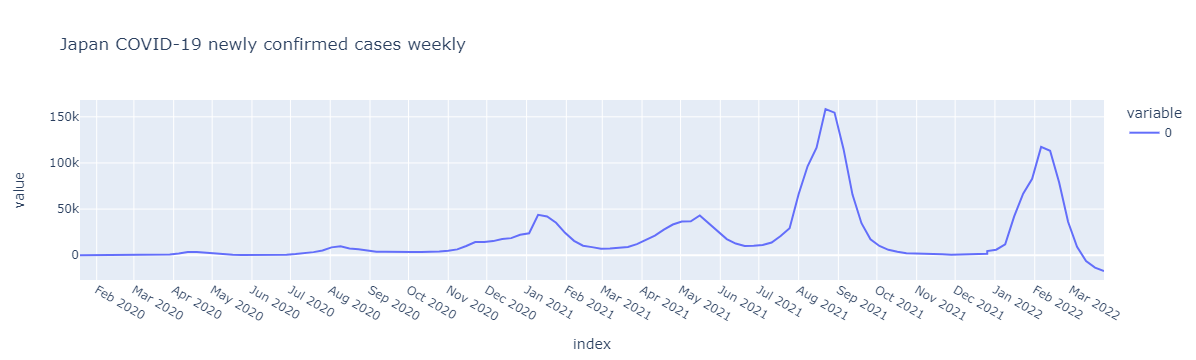

In [15]:
ts_forecast = result.predict(start=df_gr.index[-1], end=df_gr.index[-1]+relativedelta(months=3))
#display(ts_forecast[:10])

fig = px.line(pd.concat([df_gr.ALL, ts_forecast]), title='Japan COVID-19 newly confirmed cases weekly')
fig.update_layout({
    'xaxis': {
        'dtick': 'M1'
    }
})
fig.show()

## SARIMA - Tokyo

In [16]:
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(df_gr.Tokyo, order=order, seasonal_order=seasonal_order)
result = model.fit(disp=False)
result.aic

1613.8026740318107

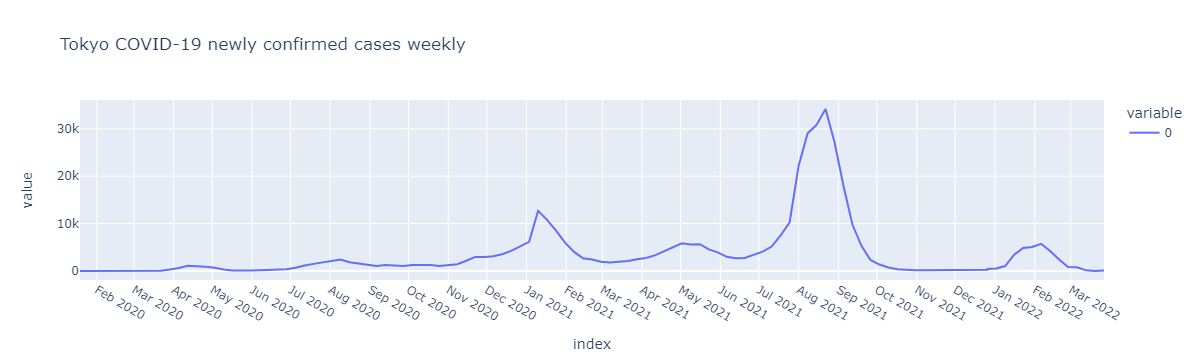

In [17]:
ts_forecast = result.predict(start=df_gr.index[-1], end=df_gr.index[-1]+relativedelta(months=3))
#display(ts_forecast[:10])

fig = px.line(pd.concat([df_gr.Tokyo, ts_forecast]), title='Tokyo COVID-19 newly confirmed cases weekly')
fig.update_layout({
    'xaxis': {
        'dtick': 'M1'
    }
})
fig.show()